In [1]:
%load_ext rpy2.ipython

In [2]:
import pandas as pd
import pyarrow.feather as feather

In [3]:
# replace this with the combined dataframe

df = pd.read_csv("data/14096681/data/ACCESS-CM2_daily_rainfall_NSW.csv")
df2 = pd.read_csv("data/14096681/data/GFDL-CM4_daily_rainfall_NSW.csv")
df3 = pd.read_csv("data/14096681/data/observed_daily_rainfall_SYD.csv")

In [4]:
# add a column called model

df["model"] = "ACCESS-CM2_daily_rainfall_NSW"
df2["model"] = "GFDL-CM4_daily_rainfall_NSW"
df3["model"] = "observed_daily_rainfall_SYD"

In [5]:
df3

,time,rain (mm/day),model
0,1889-01-01,0.006612,observed_daily_rainfall_SYD
1,1889-01-02,0.090422,observed_daily_rainfall_SYD
2,1889-01-03,1.401452,observed_daily_rainfall_SYD
3,1889-01-04,14.869798,observed_daily_rainfall_SYD
4,1889-01-05,0.467628,observed_daily_rainfall_SYD
...,...,...,...
46015,2014-12-27,0.037472,observed_daily_rainfall_SYD
46016,2014-12-28,0.158061,observed_daily_rainfall_SYD
46017,2014-12-29,0.025719,observed_daily_rainfall_SYD
46018,2014-12-30,0.729390,observed_daily_rainfall_SYD


In [6]:
# merge dataframes 

merge = pd.concat([df, df2, df3])

In [7]:
# final merged dataframe 

merge

,time,lat_min,lat_max,lon_min,lon_max,rain (mm/day),model
0,1889-01-01 12:00:00,-36.25,-35.0,140.625,142.5,3.293256e-13,ACCESS-CM2_daily_rainfall_NSW
1,1889-01-02 12:00:00,-36.25,-35.0,140.625,142.5,0.000000e+00,ACCESS-CM2_daily_rainfall_NSW
2,1889-01-03 12:00:00,-36.25,-35.0,140.625,142.5,0.000000e+00,ACCESS-CM2_daily_rainfall_NSW
3,1889-01-04 12:00:00,-36.25,-35.0,140.625,142.5,0.000000e+00,ACCESS-CM2_daily_rainfall_NSW
4,1889-01-05 12:00:00,-36.25,-35.0,140.625,142.5,1.047658e-02,ACCESS-CM2_daily_rainfall_NSW
...,...,...,...,...,...,...,...
46015,2014-12-27,NaN,NaN,NaN,NaN,3.747200e-02,observed_daily_rainfall_SYD
46016,2014-12-28,NaN,NaN,NaN,NaN,1.580613e-01,observed_daily_rainfall_SYD
46017,2014-12-29,NaN,NaN,NaN,NaN,2.571914e-02,observed_daily_rainfall_SYD
46018,2014-12-30,NaN,NaN,NaN,NaN,7.293899e-01,observed_daily_rainfall_SYD


In [8]:
# write the dataframe to feather format 

feather.write_feather(merge, 'data/final_data.feather')

In [9]:
%%R
library(tidyverse)
library(here)
library(feather)

file_path = here("data", "final_data.feather")

df <- arrow::read_feather(file_path)

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

R[write to console]: ✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

R[write to console]: here() starts at /Users/user/mds/block6/525/figshare-group-5



In [10]:
%%R

df

# A tibble: 5,198,160 x 7
   time         lat_min lat_max lon_min lon_max `rain (mm/day)` model           
   <chr>          <dbl>   <dbl>   <dbl>   <dbl>           <dbl> <chr>           
 1 1889-01-01 …   -36.2     -35    141.    142.        3.29e-13 ACCESS-CM2_dail…
 2 1889-01-02 …   -36.2     -35    141.    142.        0.       ACCESS-CM2_dail…
 3 1889-01-03 …   -36.2     -35    141.    142.        0.       ACCESS-CM2_dail…
 4 1889-01-04 …   -36.2     -35    141.    142.        0.       ACCESS-CM2_dail…
 5 1889-01-05 …   -36.2     -35    141.    142.        1.05e- 2 ACCESS-CM2_dail…
 6 1889-01-06 …   -36.2     -35    141.    142.        3.29e- 2 ACCESS-CM2_dail…
 7 1889-01-07 …   -36.2     -35    141.    142.        8.91e- 2 ACCESS-CM2_dail…
 8 1889-01-08 …   -36.2     -35    141.    142.        3.16e- 2 ACCESS-CM2_dail…
 9 1889-01-09 …   -36.2     -35    141.    142.        3.11e- 2 ACCESS-CM2_dail…
10 1889-01-10 …   -36.2     -35    141.    142.        3.30e- 2 ACCESS-CM2_dail…
# 

In [57]:
%%R

library(lubridate)

sam <- sample_n(df, 500)
sam %>% filter(model == "observed_daily_rainfall_SYD") %>% select(time, model)

# A tibble: 6 x 2
  time       model                      
  <chr>      <chr>                      
1 1972-07-22 observed_daily_rainfall_SYD
2 1924-11-19 observed_daily_rainfall_SYD
3 1899-12-12 observed_daily_rainfall_SYD
4 1934-02-06 observed_daily_rainfall_SYD
5 1962-02-07 observed_daily_rainfall_SYD
6 1947-10-23 observed_daily_rainfall_SYD


In [58]:
%%R

unique(sam$model)

[1] "ACCESS-CM2_daily_rainfall_NSW" "GFDL-CM4_daily_rainfall_NSW"  
[3] "observed_daily_rainfall_SYD"  


In [ ]:
%%R

df %>% filter(model == "observed_daily_rainfall_SYD") 

In [47]:
%%R
library(lubridate)


df$time <- ymd_hms(df$time)
glimpse(df)

Rows: 5,198,160
Columns: 7
$ time            <dttm> 1889-01-01 12:00:00, 1889-01-02 12:00:00, 1889-01-03 …
$ lat_min         <dbl> -36.25, -36.25, -36.25, -36.25, -36.25, -36.25, -36.25…
$ lat_max         <dbl> -35, -35, -35, -35, -35, -35, -35, -35, -35, -35, -35,…
$ lon_min         <dbl> 140.625, 140.625, 140.625, 140.625, 140.625, 140.625, …
$ lon_max         <dbl> 142.5, 142.5, 142.5, 142.5, 142.5, 142.5, 142.5, 142.5…
$ `rain (mm/day)` <dbl> 3.293256e-13, 0.000000e+00, 0.000000e+00, 0.000000e+00…
$ model           <chr> "ACCESS-CM2_daily_rainfall_NSW", "ACCESS-CM2_daily_rai…


In [69]:
%%R
df_2014 <- df %>% filter(time >='2014-01-01' & time <='2014-12-31')
df_2014

# A tibble: 41,133 x 7
   time         lat_min lat_max lon_min lon_max `rain (mm/day)` model           
   <chr>          <dbl>   <dbl>   <dbl>   <dbl>           <dbl> <chr>           
 1 2014-01-01 …   -36.2     -35    141.    142.        0.000158 ACCESS-CM2_dail…
 2 2014-01-02 …   -36.2     -35    141.    142.        0        ACCESS-CM2_dail…
 3 2014-01-03 …   -36.2     -35    141.    142.        0.372    ACCESS-CM2_dail…
 4 2014-01-04 …   -36.2     -35    141.    142.        0.0989   ACCESS-CM2_dail…
 5 2014-01-05 …   -36.2     -35    141.    142.        0.0656   ACCESS-CM2_dail…
 6 2014-01-06 …   -36.2     -35    141.    142.        0        ACCESS-CM2_dail…
 7 2014-01-07 …   -36.2     -35    141.    142.        0        ACCESS-CM2_dail…
 8 2014-01-08 …   -36.2     -35    141.    142.        0.0137   ACCESS-CM2_dail…
 9 2014-01-09 …   -36.2     -35    141.    142.        0        ACCESS-CM2_dail…
10 2014-01-10 …   -36.2     -35    141.    142.        0        ACCESS-CM2_dail…
# … w

In [ ]:
%%R

subset(df_2014$model, model == )

In [76]:
%%R
if 
df$time <- format(df$time, format = "%Y-%m:%d")

df %>% filter(model == "observed_daily_rainfall_SYD") 

# A tibble: 46,020 x 7
   time       lat_min lat_max lon_min lon_max `rain (mm/day)` model             
   <chr>        <dbl>   <dbl>   <dbl>   <dbl>           <dbl> <chr>             
 1 "NA      …      NA      NA      NA      NA         0.00661 observed_daily_ra…
 2 "NA      …      NA      NA      NA      NA         0.0904  observed_daily_ra…
 3 "NA      …      NA      NA      NA      NA         1.40    observed_daily_ra…
 4 "NA      …      NA      NA      NA      NA        14.9     observed_daily_ra…
 5 "NA      …      NA      NA      NA      NA         0.468   observed_daily_ra…
 6 "NA      …      NA      NA      NA      NA         0       observed_daily_ra…
 7 "NA      …      NA      NA      NA      NA         0.404   observed_daily_ra…
 8 "NA      …      NA      NA      NA      NA         0.112   observed_daily_ra…
 9 "NA      …      NA      NA      NA      NA         0       observed_daily_ra…
10 "NA      …      NA      NA      NA      NA         0       observed_daily_ra…
# … w

In [87]:
%%R

df_2014 <- df %>% select(time, model, `rain (mm/day)`) %>% filter(time>='2014-01-01' & time<='2014-12-31', 
                         model == "ACCESS-CM2_daily_rainfall_NSW" | model == "observed_daily_rainfall_SYD")

df_2014

# A tibble: 15,653 x 3
   time                model                         `rain (mm/day)`
   <chr>               <chr>                                   <dbl>
 1 2014-01-01 12:00:00 ACCESS-CM2_daily_rainfall_NSW        0.000158
 2 2014-01-02 12:00:00 ACCESS-CM2_daily_rainfall_NSW        0       
 3 2014-01-03 12:00:00 ACCESS-CM2_daily_rainfall_NSW        0.372   
 4 2014-01-04 12:00:00 ACCESS-CM2_daily_rainfall_NSW        0.0989  
 5 2014-01-05 12:00:00 ACCESS-CM2_daily_rainfall_NSW        0.0656  
 6 2014-01-06 12:00:00 ACCESS-CM2_daily_rainfall_NSW        0       
 7 2014-01-07 12:00:00 ACCESS-CM2_daily_rainfall_NSW        0       
 8 2014-01-08 12:00:00 ACCESS-CM2_daily_rainfall_NSW        0.0137  
 9 2014-01-09 12:00:00 ACCESS-CM2_daily_rainfall_NSW        0       
10 2014-01-10 12:00:00 ACCESS-CM2_daily_rainfall_NSW        0       
# … with 15,643 more rows


In [ ]:
%%R



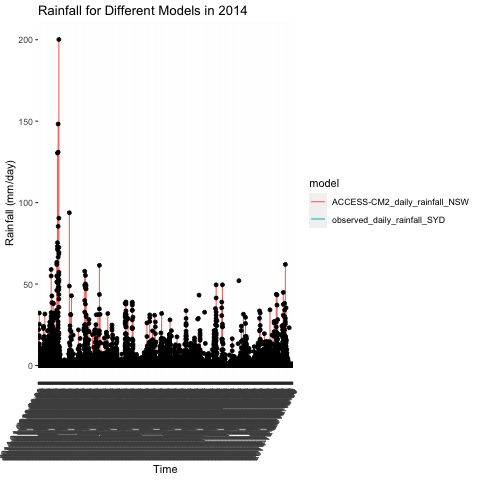

In [77]:
%%R

library(ggplot2)

rainfall <- ggplot(df_2014, aes(x=time, y=`rain (mm/day)`)) +
    geom_line(aes(color = model)) + 
    geom_point() +
    theme(axis.text.x=element_text(angle=60, hjust=1)) +
    labs(title = "Rainfall for Different Models in 2014", x = "Time", y = "Rainfall (mm/day)")

rainfall